In [22]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
train_images.shape

(60000, 28, 28)

In [24]:
 len(train_labels)

60000

In [25]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
test_images.shape

(10000, 28, 28)

In [27]:
len(test_labels)

10000

In [28]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [30]:
network.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [31]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 

In [32]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [33]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
 14/469 [..............................] - ETA: 3s - loss: 1.1344 - accuracy: 0.6786

2022-02-28 20:54:25.253019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 4s 8ms/step - loss: 0.2581 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1042 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0679 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0493 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0366 - accuracy: 0.9890


In [34]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

 23/313 [=>............................] - ETA: 2s - loss: 0.0629 - accuracy: 0.9783

2022-02-28 20:54:44.641927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.0640 - accuracy: 0.9806
test_acc: 0.9806000590324402


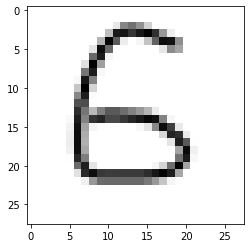

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open("img1.png").convert('L').resize((28, 28))
arr = np.array(im)

digit = arr.reshape(1, 28 * 28)
digit = 1 - digit.astype('float32') / 255
plt.imshow(digit[0].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

In [36]:
digit

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09019607, 0.46666664, 0.54509807,
        0.41960782, 0.18431371, 0.00392157, 0.  

In [37]:
cl = network.predict(digit)[0]
np.argmax(cl)

2022-02-28 20:54:46.988457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6

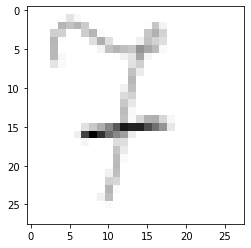

In [38]:
im = Image.open("img2.png").convert('L').resize((28, 28))
arr = np.array(im)

digit = arr.reshape(1, 28 * 28)
digit = 1 - digit.astype('float32') / 255
plt.imshow(digit[0].reshape((28, 28)), cmap=plt.cm.binary)
plt.show()

In [39]:
cl = network.predict(digit)[0]
np.argmax(cl)

2